In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import diversity_score_module as dsm

#setup
df = pd.read_csv('data/raw_data/tmdb_5000_credits.csv') #load dataset
div_scores = np.zeros(len(df.index)) #initalize scores
cast_sizes = np.zeros(len(df.index), dtype=int) #initialize case sizes
wanttoweight = True #do you want to weight lead roles?

#compute scores for all moves
for m in df.index: #loop over all movies
    cast = json.loads(df['cast'][m]) #extract cast from dataset
    [div_scores[m],cast_sizes[m]] = dsm.compute_diversity_score(cast,wanttoweight)
    
df['gender diversity score'] = div_scores #put scores into dataframe
real_div_scores = div_scores[np.argwhere(~np.isnan(div_scores))] #get real scores for distribution

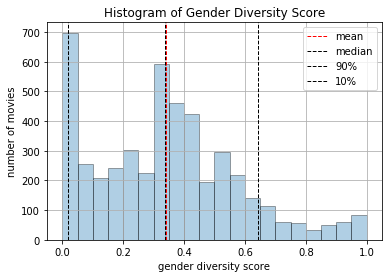

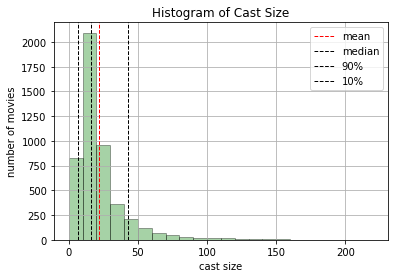

In [4]:
#visualize cast and diversity distributions
dsm.viz_distribution(real_div_scores,'diversity score')
dsm.viz_distribution(cast_sizes,'cast size')